<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

All cells must be suitably commented / documented.

### Read Dataset

In [2]:
import numpy as np
import pandas as pd

In [5]:
data=pd.read_csv('pima-indians-diabetes.csv')
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
df=pd.DataFrame(data)
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
df.rename(columns={"6": "Pregnancies", "148": "Glucose", "72":"BloodPressure","35":"SkinThickness","0":"Insulin","33.6":"BMI","0.627":"DiabetesP","50":"Age","1":"HasDiabetes"},inplace = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesP,Age,HasDiabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [8]:
B=pd.DataFrame({'Pregnancies':[6],'Glucose':[148],'BloodPressure':['72'],'SkinThickness':[35],'Insulin':[0],'BMI':[33.6],'DiabetesP':[0.627],'Age':[30],'HasDiabetes':[1]})
B

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesP,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,30,1


In [11]:
df = pd.concat([B, df]).reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesP,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,30,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check for Missing Data

In [12]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DiabetesP        0
Age              0
HasDiabetes      0
dtype: int64

### Handle CategorValuesical 

In [13]:
df["Pregnancies"] = df["Pregnancies"].replace(0,df["Pregnancies"].median())
df["Glucose"] = df["Glucose"].replace(0,df["Glucose"].median())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].median())
df["Insulin"] = df["Insulin"].replace(0,df["Insulin"].median())   
df["DiabetesP"] = df["DiabetesP"].replace(0,df["DiabetesP"].median())
df["Age"] = df["Age"].replace(0,df["Age"].median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesP,Age,HasDiabetes
0,6,148,72,35,30.5,33.6,0.627,30,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


In [14]:
df["BMI"] = df["BMI"].replace(0,df["BMI"].median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesP,Age,HasDiabetes
0,6,148,72,35,30.5,33.6,0.627,30,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


### Split Data for Training and Testing

In [15]:
X=df.drop(['HasDiabetes'],axis=1)
Y=df['HasDiabetes']
print(X)
print(Y)

     Pregnancies  Glucose BloodPressure  ...   BMI  DiabetesP  Age
0              6      148            72  ...  33.6      0.627   30
1              1       85            66  ...  26.6      0.351   31
2              8      183            64  ...  23.3      0.672   32
3              1       89            66  ...  28.1      0.167   21
4              3      137            40  ...  43.1      2.288   33
..           ...      ...           ...  ...   ...        ...  ...
763           10      101            76  ...  32.9      0.171   63
764            2      122            70  ...  36.8      0.340   27
765            5      121            72  ...  26.2      0.245   30
766            1      126            60  ...  30.1      0.349   47
767            1       93            70  ...  30.4      0.315   23

[768 rows x 8 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: HasDiabetes, Length: 768, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

### Apply different Classification Algorithms and tune them

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model1 = LogisticRegression(max_iter=10000)
model2 = LinearSVC(dual=False)
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()
model5 = GaussianNB()

In [26]:
clf=[]
clf.append(model1)
clf.append(model2)
clf.append(model3)
clf.append(model4)
clf.append(model5)

### Get performance metrics for all the applied classifiers

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

for i in clf:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  A=accuracy_score(y_test, y_pred)
  print("Model is: ",i)
  print("Accuracy is %s"%(A*100),'%')
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix is %s"%(cm))
  print('\n\n')

Model is:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy is 83.11688311688312 %
Confusion Matrix is [[98  9]
 [17 30]]



Model is:  LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy is 82.46753246753246 %
Confusion Matrix is [[98  9]
 [18 29]]



Model is:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samp

In [42]:
from sklearn.metrics import classification_report

for i in clf:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  B=classification_report(y_test,y_pred)
  print("Classification Report of %s is %s"%(i, B))

Classification Report of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is               precision    recall  f1-score   support

           0       0.85      0.92      0.88       107
           1       0.77      0.64      0.70        47

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154

Classification Report of LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) is               precision    recall  f1-score   support

   

### Visually compare the performance of all classifiers

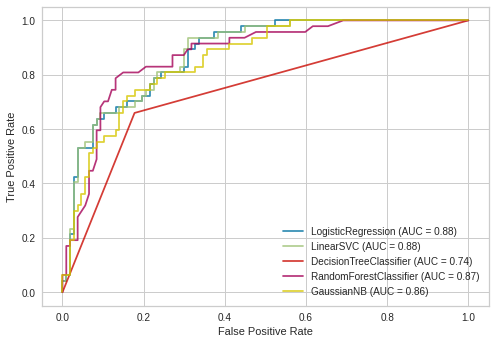

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

for j in clf:
  j.fit(X_train,y_train)
  ax = plt.gca()
  rfc_disp = plot_roc_curve(j, X_test, y_test, ax=ax, alpha=0.8)
  #svc_disp.plot(ax=ax, alpha=0.8)

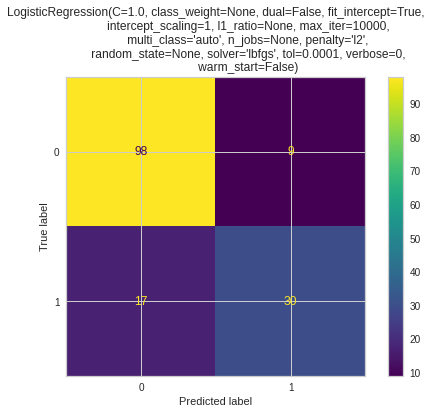

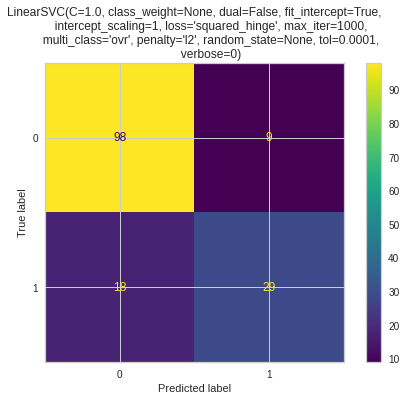

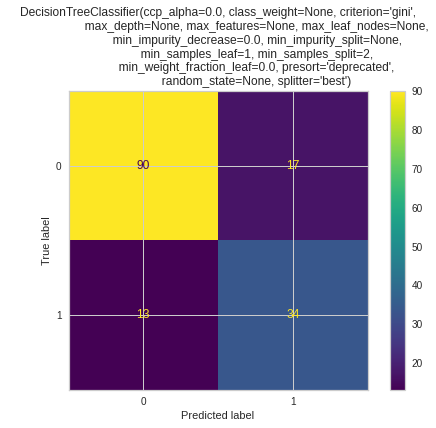

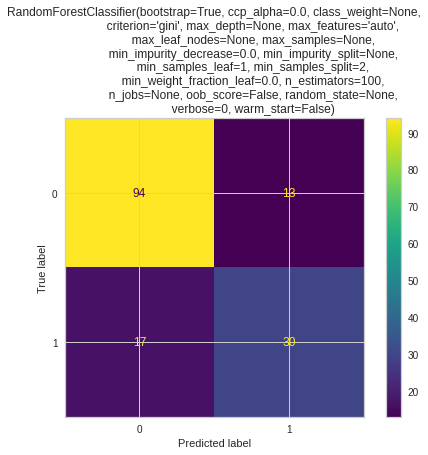

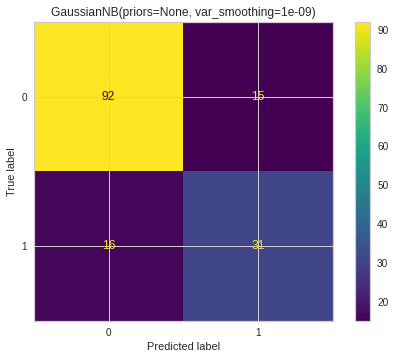

In [81]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

for j in clf:
  j.fit(X_train,y_train)
  disp = plot_confusion_matrix(j, X_test, y_test)
  disp.ax_.set_title(j)

plt.show()
